In [2]:
%store -r data_cat

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
print(__version__) # requires version >= 1.9.0

# Para Notebooks
init_notebook_mode(connected=True)

# Para uso offline colocar
cf.go_offline()

5.8.1


In [5]:
def showCatsBy(by,xlabel=''): #views
  if xlabel == '': xlabel = by 
  plt.figure(figsize=(16,8))
  plt.xticks(rotation=90)
  catplot = sns.boxplot(x="snippet.title", y=by, data=data_cat, palette='rainbow')
  catplot.set(title= xlabel +' por Categoría', ylabel="Categoría", xlabel=xlabel)

def outliersToMax(cat, since:int, col = 'views'):
  nCat = len(data_cat[data_cat['snippet.title'] == cat])
  nCatOut = len(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
  print( ' Cantidad de datos de entretainment:', nCat, '\n', 'Cantidad de datos outliers:', nCatOut )
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])
  print(f'''De {nCat} filas, {nCatOut} son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a {since}.''')
  data_cat.loc[ (data_cat['snippet.title'] == cat) & (data_cat[col]>since), col ] = (
    data_cat[data_cat['snippet.title'] == cat ][data_cat[col]<since][col].max() )
  display(data_cat[data_cat['snippet.title'] == cat][data_cat[col]>since])

##### 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

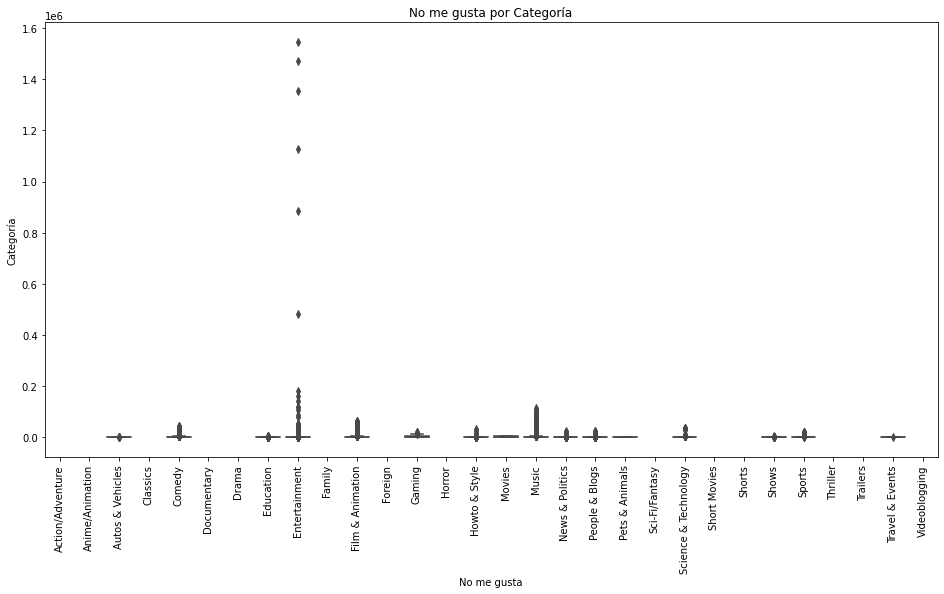

In [6]:
showCatsBy('dislikes','No me gusta')

In [7]:
outliersToMax('Entertainment', 0.2*1e6, 'dislikes')

 Cantidad de datos de entretainment: 14766 
 Cantidad de datos outliers: 6


C:\Users\GART-03\AppData\Local\Temp\ipykernel_6952\3180301603.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_6952\3180301603.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



video_id trending_date  \
4667  FlsCjmMhFmw    2017-12-07   
4782  FlsCjmMhFmw    2017-12-08   
4968  FlsCjmMhFmw    2017-12-09   
5163  FlsCjmMhFmw    2017-12-10   
5348  FlsCjmMhFmw    2017-12-11   
5646  FlsCjmMhFmw    2017-12-12   

                                                  title      channel_title  \
4667  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
4782  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
4968  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
5163  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
5348  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   
5646  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  YouTube Spotlight   

     category_id              publish_time  \
4667          24 2017-12-06 17:58:51+00:00   
4782          24 2017-12-06 17:58:51+00:00   
4968          24 2017-12-06 17:58:51+00:00   
5163          24 2017-12-06 17:58:51+00:00   
5348          24 2017-12-06 17:58:51+00:00   
5646          24 2017-12-06 17:58:51+00:00   

                                                   tags      views   likes  \
4667  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...   24784863  975738   
4782  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...   52611730  975738   
4968  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...   75969469  975738   
5163  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  100911567  975738   
5348  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  113876217  975738   
5646  Rewind|"Rewind 2017"|"youtube rewind 2017"|"#Y...  125432237  975738   

      dislikes  ...  video_error_or_removed          state        lat  \
4667    483933  ...                   False   Chhattisgarh  22.090420   
4782    884954  ...                   False  Uttar Pradesh  27.599981   
4968   1127805  ...                   False          Bihar  25.785414   
5163   1353650  ...                   False         Kerala   8.900373   
5348   1470387  ...                   False       Nagaland  25.666998   
5646   1545017  ...                   False            Goa  15.491997   

            lon                         geometry                   kind  \
4667  82.159987  POINT (82.15998734 22.09042035)  youtube#videoCategory   
4782  78.050006  POINT (78.05000565 27.59998069)  youtube#videoCategory   
4968  87.479973   POINT (87.4799727 25.78541445)  youtube#videoCategory   
5163  76.569993  POINT (76.56999263 8.900372741)  youtube#videoCategory   
5348  94.116570   POINT (94.11657019 25.6669979)  youtube#videoCategory   
5646  73.818001    POINT (73.81800065 15.491997)  youtube#videoCategory   

                                                   etag  \
4667  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
4782  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
4968  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
5163  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
5348  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   
5646  "XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...   

             snippet.channelId  snippet.title snippet.assignable  
4667  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
4782  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
4968  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
5163  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
5348  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  
5646  UCBR8-60-B28hp2BmDPdntcQ  Entertainment               True  

[6 rows x 24 columns]

De 14766 filas, 6 son outliers de la categoría entretainment.
    Estos serán ajustados al máximo menor a 200000.0.


C:\Users\GART-03\AppData\Local\Temp\ipykernel_6952\3180301603.py:16: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\GART-03\AppData\Local\Temp\ipykernel_6952\3180301603.py:17: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry, kind, etag, snippet.channelId, snippet.title, snippet.assignable]
Index: []

[0 rows x 24 columns]

[Text(0.5, 1.0, 'No me gusta por categoría'),
 Text(0, 0.5, 'Categoría'),
 Text(0.5, 0, 'No me gusta')]

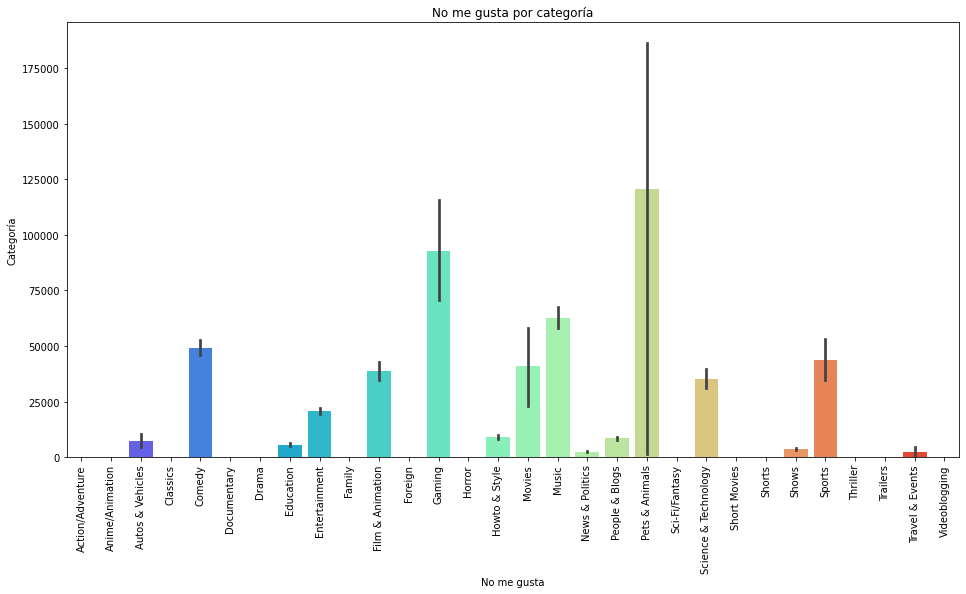

In [8]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x="snippet.title", y="likes", data=data_cat, palette='rainbow').set(title='No me gusta por categoría', ylabel="Categoría", xlabel='No me gusta')

In [9]:
data_cat_ld = data_cat[["snippet.title","likes","dislikes"]].melt('snippet.title', var_name='cols', value_name='vals')
data_cat_ld.head()

snippet.title   cols   vals
0  Film & Animation  likes  33966
1   News & Politics  likes    735
2     Entertainment  likes   2011
3            Comedy  likes  70353
4     Entertainment  likes    492

[Text(0.5, 1.0, 'Me gusta y No me gusta por categoría')]

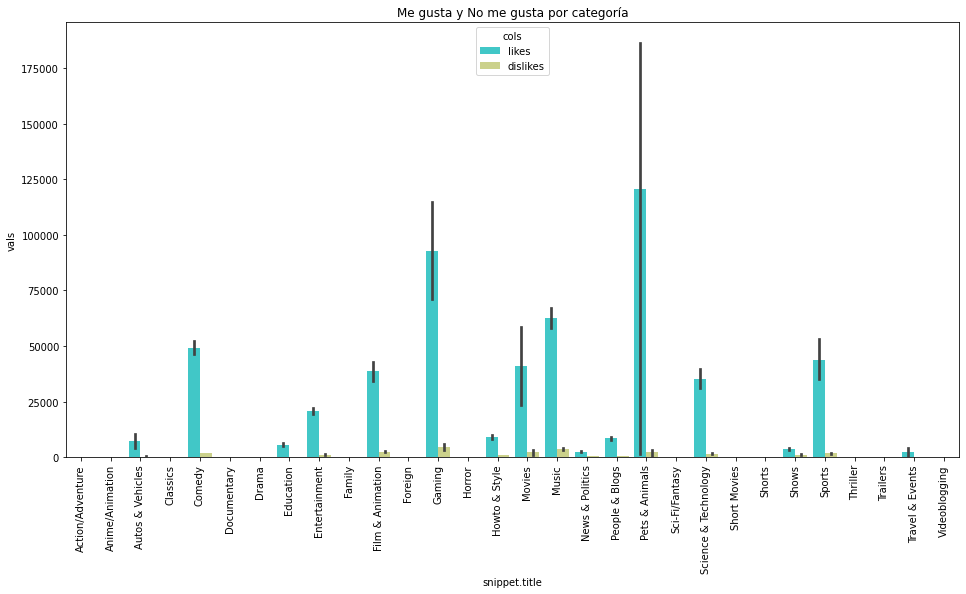

In [10]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(x="snippet.title", y="vals", hue='cols', data=data_cat_ld, palette='rainbow').set(title='Me gusta y No me gusta por Categoría')

In [11]:
data_cat[['snippet.title','likes','dislikes']].iplot(
  kind='bar',barmode='stack', title='Me gusta y No me gusta por Categorías',categories='snippet.title')

In [12]:
dc_ld_ratio = data_cat[['snippet.title','likes','dislikes']]
dc_ld_ratio['ratio'] = data_cat['likes'] / data_cat['dislikes']
dc_ld_ratio

snippet.title  likes  dislikes      ratio
0      Film & Animation  33966       798  42.563910
1       News & Politics    735       904   0.813053
2         Entertainment   2011       243   8.275720
3                Comedy  70353      1624  43.320813
4         Entertainment    492       293   1.679181
...                 ...    ...       ...        ...
38528            Comedy   3291       404   8.146040
38529     Entertainment   1726       478   3.610879
38530     Entertainment   1216       453   2.684327
38531     Entertainment    698       115   6.069565
38532     Entertainment  22466      1609  13.962710

[33106 rows x 4 columns]

In [18]:
data_cat[['snippet.title','likes','dislikes']].describe()

likes       dislikes
count  3.310600e+04   33106.000000
mean   2.454997e+04    1397.664019
std    8.068059e+04    5467.804072
min    0.000000e+00       0.000000
25%    7.860000e+02      97.000000
50%    2.751000e+03     289.000000
75%    1.199475e+04     930.000000
max    1.101522e+06  182589.000000

In [19]:
data_cat[['snippet.title','likes','dislikes']].min()

C:\Users\GART-03\AppData\Local\Temp\ipykernel_6952\4207604486.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



likes       0
dislikes    0
dtype: int32

c:\Users\GART-03\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning:

invalid value encountered in subtract



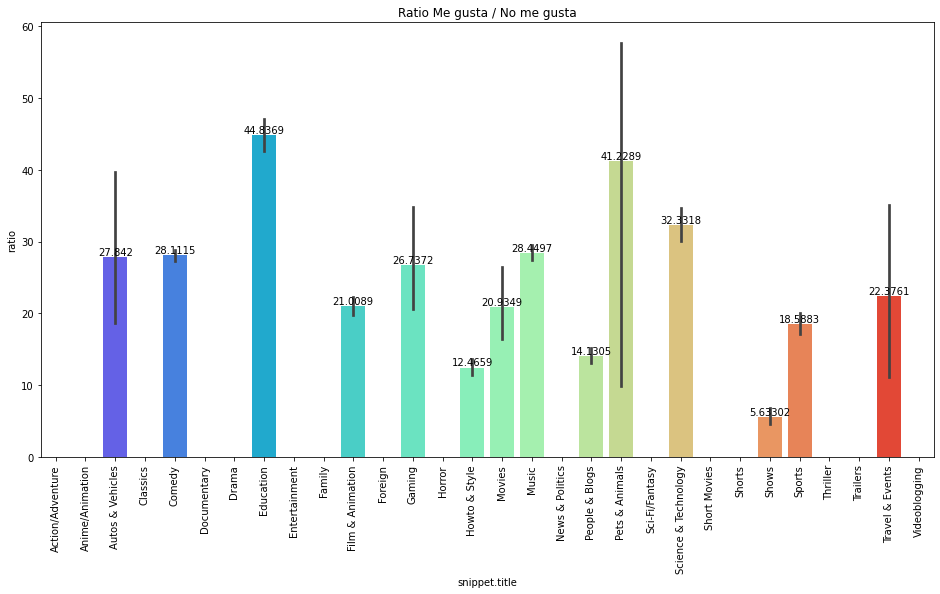

In [13]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
dc_ld_ratio_plot = sns.barplot(x="snippet.title", y="ratio", data=dc_ld_ratio, palette='rainbow')
dc_ld_ratio_plot.set(title='Ratio Me gusta / No me gusta')
for i in dc_ld_ratio_plot.containers: dc_ld_ratio_plot.bar_label(i,)

In [14]:
dc_ld_ratio.describe()

likes       dislikes         ratio
count  3.310600e+04   33106.000000  3.239500e+04
mean   2.454997e+04    1397.664019           inf
std    8.068059e+04    5467.804072           NaN
min    0.000000e+00       0.000000  8.576642e-02
25%    7.860000e+02      97.000000  5.090909e+00
50%    2.751000e+03     289.000000  1.039024e+01
75%    1.199475e+04     930.000000  2.317957e+01
max    1.101522e+06  182589.000000           inf

In [15]:
%store data_cat

Stored 'data_cat' (DataFrame)
